<a href="https://colab.research.google.com/github/Big-Shu-Nim/Visualization/blob/main/%EC%BA%90%EA%B8%80%EB%BD%80%EA%B0%9C%EA%B8%B0_matplotlib_Seaborn_010624_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#요약
이 노트북은 캐글뽀개기(2021)의 93-136의 내용을 학습한 주피터 노트북입니다.

#공부시간
캐글뽀개기
Scheduled: Jan 6, 2023 5:00 PM to 7:30 PM, GMT+9

캐글뽀개기
Scheduled: Jan 6, 2023 7:30 PM to 8:00 PM, GMT+9

캐글뽀개기
Scheduled: Jan 6, 2023 8:30 PM to 9:00 PM, GMT+9

캐글뽀개기
Scheduled: Jan 7, 2023 12:05 PM to 2:20 PM, GMT+9

# 한줄평
  정말 쉽게 기초를 잘 이해할수 있었다 !

In [1]:
# matplotlib Font Set up $
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
# # 다음을 실행하면 authorization code 입력을 요청받습니다.
# # 출력된 링크를 클릭하고 Google 계정으로 로그인한 뒤,
# # authorization code를 복사해서 붙여 넣습니다.
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#working_dir = 'MLSys_100Knocks' #　※※ 여러분이 만든 폴더 경로가 다를 때는 다음을 변경합니다. ※※
path = f'/content/drive/MyDrive/캐글뽀개기'
os.chdir(path)

In [6]:
# y-finace api 설치
! pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

Looking in indexes: https://pypi.anaconda.org/ranaroussi/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=43065561ffe2a97162b967ff346ab710290e9c49a542c786a32c28e7ec5616a5
  Stored in directory: /root/.cache/pip/wheels/12/3c/b9/ea0886d7dfd738a1a7c4810f7fdece2fbe8c21338c780a77ed
Successfully built yfinance


In [7]:
import yfinance as yf

data=yf.download('AAPL', '2019-08-01', '2020-08-01') # yf.dwonload(대상, 조회시작일, 조회종료일)
ts=data['Open'] # Open, High, Low, Close, Adj Close, Volume 중에서 Open만 가져오기
print(ts.head())

[*********************100%***********************]  1 of 1 completed
Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64


## 1Matplotlib.pyplot API 구현하기



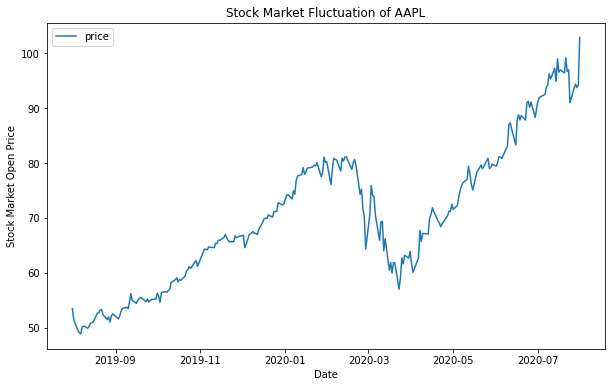

In [8]:
plt.figure(figsize=(10,6))
plt.plot(ts)
plt.legend(labels=['price'], loc='best')
plt.title('Stock Market Fluctuation of AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Market Open Price')
plt.show()

## 2)객체지향 API 사용하기


In [9]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas # Backend Layer 에서 가져옵니다.
from matplotlib.figure import Figure # Artist Layer에서 가져옵니다.

fig=Figure() # Figure 객체를 만들어서 생성자(constructor)을 만듭니다. 

import numpy as np
np.random.seed(6) # 가상의 데이터를 만듭니다
x= np.random.randn(20000)

ax=fig.add_subplot(111)  #Artist Layer에서 Axes 객체를 만듭니다.
ax.hist(x,100) # Axes 객체에 있는 hist()를 호출합니다.
ax.set_title('Artist Layer Histogram') # Axes 객체에 있는 set_title을 호출합니다
fig.savefig('Matplotlib_histogram.png') # 마지막으로 figure 객체에 구현된 Axes를 담아서 패키징화 해 내보냅니다

## 3) Pyplot API + 객체지향 API 



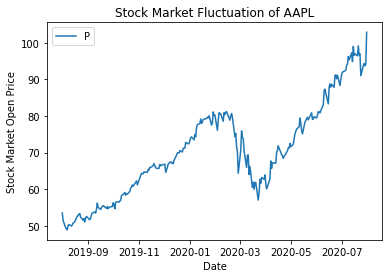

In [10]:
fig=plt.figure() 
# plt class 를 사용해 figure 객체를 먼저 생성하는데 
# 이뜻은 Backend Layer를 호출 한다는 의미입니다.


ax=fig.subplots() # fig, ax= plt.subplos
#Axes를 선언하는 것은 Artist Layer를 호출한다는 의미입니다.
#fig, ax 두 줄로 선언하거나 fig, ax= plt.subplots()와 같이 사용할수 있습니다.

ax.plot(ts)
ax.set_title("Stock Market Fluctuation of AAPL")
ax.legend(labels='Price', loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Market Open Price')
plt.show()

#5-1 막대그래프

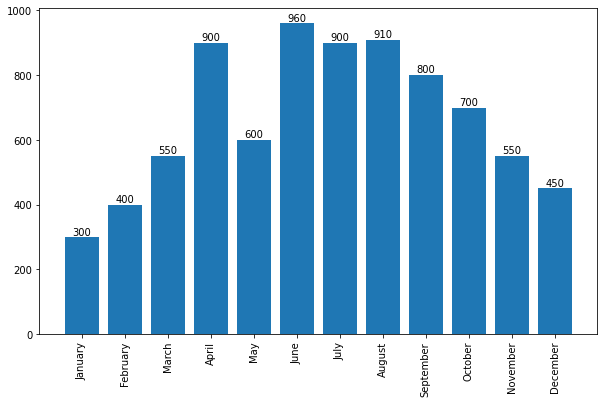

In [11]:
import calendar

month_list=[1,2,3,4,5,6,7,8,9,10,11,12]
sold_list =[300,400,550,900,600,960,900,910,800,700,550,450]

fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(month_list, calendar.month_name[1:13], rotation=90)
# x축 눈금을 조절합니다 
# calendar.month_name[1:13]-- 리스트 형태로 January~December 까지 출력합니다.
plot=ax.bar(month_list, sold_list)

for rect in plot:
  height=rect.get_height()
  ax.text(rect.get_x()+rect.get_width()/2., 1.002*height, '%d'%int(height),
          ha='center', va='bottom')
  #ax.text() 그래프에 주석을 추가하겠다는 의미입니다.
  # rect.get_x()+rect.get_width()/2. X좌표 시작위치에 막대그래프 두께의 절반을 합한 값입니다.
  # 1.002*height y좌표인 높이보다 0.2% 높은 주석이 달릴 위치입니다.
  #%d'%int(height) 각각의 주석값입니다.
  #'Ha': Horizontalalignment'라고 쓰며 {'center', 'right' , 'left'} 중 하나를 고를 수 있습니다.
  #'Va': 'Verticalalgnment'라고 쓰며 중 하나를 고를수 있습니다. {"center',""top", 'Bottom', 'Baseline', 'center_Baseline}
  # 중 하나를 고를 수있습니다.
plt.show()

## 산점도 그래프 

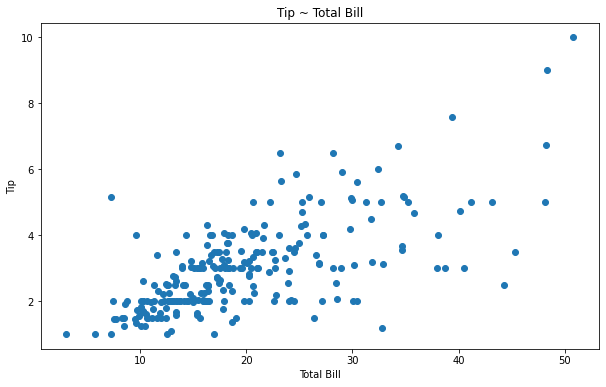

In [12]:
import seaborn as sns 

tips = sns.load_dataset("tips")
x=tips['total_bill']
y=tips['tip']

fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(x,y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip ~ Total Bill')

fig.show()

In [13]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


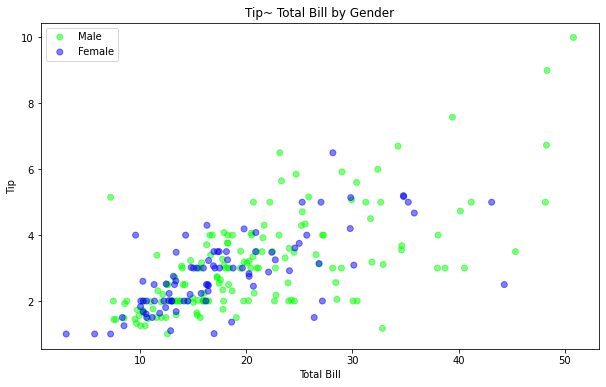

In [14]:
x=tips['total_bill']
y=tips['tip']

tips['sex_color']=tips['sex'].map({"Female":"#0000FF", "Male":"#00FF00"})
# 성별로 칼러를 지정합니다. 저라면 np.where 을 사용했을것 같은데 map 함수로 이렇게 지정이 되군요. 
fig,ax=plt.subplots(figsize=(10,6))
for label, data in tips.groupby('sex'):  # label 과 data 라는 객체를 반복하겠습니다. 이들은 tips.groupby('sex')에 있는정보입니다.
  ax.scatter(data['total_bill'], data['tip'], label=label, # 그렇게 하는 이유는 성별로 나눠서 그려야하기 떄문입니다.
             color=data['sex_color'], alpha=0.5) 
  ax.set_xlabel('Total Bill')
  ax.set_ylabel('Tip')
  ax.set_title('Tip~ Total Bill by Gender')

ax.legend()
fig.show()

# 히스토그램 


* 이 그래프는 연속형 변수의 분포를 그리는 데 사용합니다. 연속형 변수들의 값이 빈(bin)수로 분할되어 x축에 표시되며, 각 빈에 포함되는 범위의 수치들은 카운트화되어 y축에 표시 됩니다. y축에는 카운트 대신 총량의 백분율을 표시해 확률 분포를 나타내며 이러한 그래프는 통계분석에 사용합니다. 

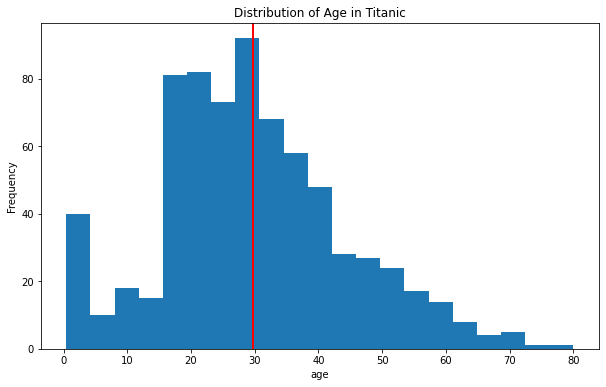

In [15]:
titanic=sns.load_dataset('titanic')
age=titanic['age']

nbins=21

fig,ax =plt.subplots(figsize=(10,6))
ax.hist(age, bins=nbins)
ax.set_xlabel('age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Age in Titanic')
ax.axvline(x=age.mean(), linewidth=2, color='r')
#axvline은 데이터의 평균 데이터의 평균선을 세로로 긋는 함수입니다. 그런데 이 함수를 활용하려면
#X 인수에 적당한 값인 age.mean()의 평균값을 넣고 , linewidth는 선 굵기 지정, color는 선의 색깔을 지정합니다.
fig.show()

## 박스플롯
 

<bound method Figure.show of <Figure size 720x432 with 1 Axes>>

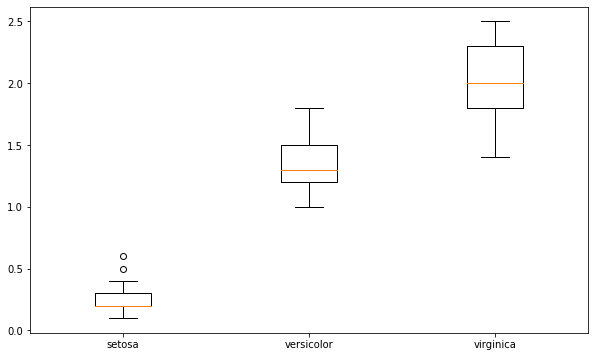

In [16]:
iris= sns.load_dataset('iris')

data=[iris[iris['species']=='setosa']['petal_width'],
      iris[iris['species']=='versicolor']['petal_width'],
      iris[iris['species']=='virginica']['petal_width']]

fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

fig.show

# 히트맵 그래프


In [17]:
# flights 데이터 프레임을 가져옵니다.
flights=sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [18]:
flights=flights.pivot('month', 'year', 'passengers')
flights
# 로우? 인덱스로 '월'을 쓰고 칼럼으로 'year' 그리고 데이터 값으로 'passengers'를 씁니다.

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


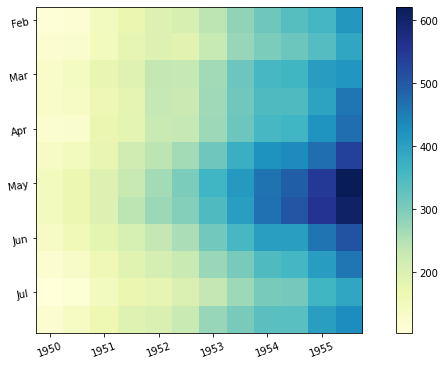

In [19]:
flights=sns.load_dataset('flights')
flights=flights.pivot('month', 'year', 'passengers')

fig, ax= plt.subplots(figsize=(12,6))
im=ax.imshow(flights, cmap='YlGnBu') # cmap 은 color-maps 에 해당되는 영역으로 종류가 다양합니다. 
ax.set_xticklabels(flights.columns, rotation=20)
ax.set_yticklabels(flights.index, rotation=10)
fig.colorbar(im) # color bar 를 생성하려면 imshow()로 구현된 객체를 im으로 저장한 후 dlfmf fig.colorbar()에 추가합니다.

fig.show()

열을 뜻하는 힛과 지도를 뜻하는 맵이 결합된 단어로 다양한 강도, 색상으로
데이터 범위를 시각화하는 데 사용됩니다. 

- Matplotlib 모듈에서는 Imshow 함수를 활용해 상관관계 그래프를 
그립니다.
여기에 Colorbar를 추가해 가독성을 부여합니다.


# Seaborn 라이브러리 

## 산점도, 회귀선이 있는 산점도 

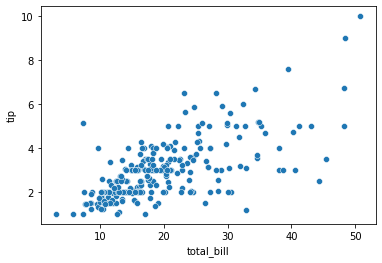

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')

sns.scatterplot(x='total_bill', y='tip', data=tips)

plt.show()
# seaborn 의 특징은 x축과 y축만 입력하면 그래프를 그릴수 있다는 점입니다. 

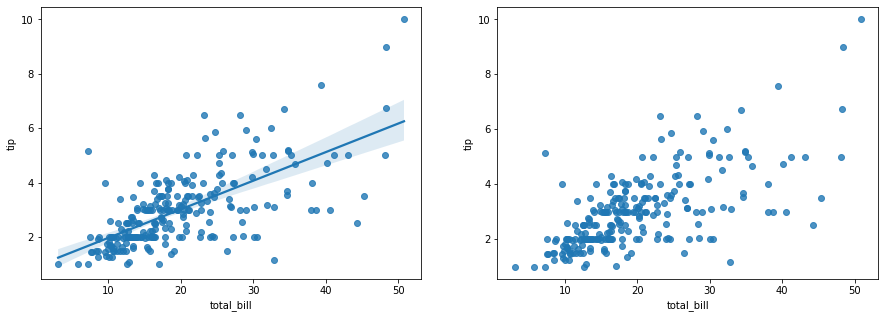

In [22]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.regplot(x='total_bill',  #regplot 은 회귀선을 그릴수 있는 플로팅입니다.
             y='tip',
             data=tips,
             ax=ax[0], # 0번째 칼럼에 맞추겠습니다.
             fit_reg=True)


sns.regplot(x='total_bill',
             y='tip',
             data=tips,
             ax=ax[1], # 1번째 칼럼에 맞추겠습니다.
             fit_reg=False)

### Tip Matplotlib 와 Seaborn을 동시에 사용한 Subplotting 기법

- 두 라이브러리 문법의 경계가 모호하다.
- 하지만 객체지향으로 접근하면 도움이 된다. 

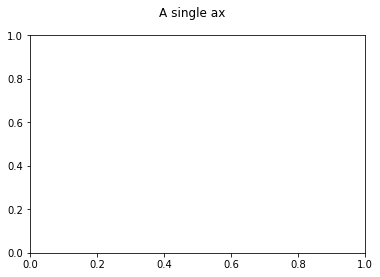

In [23]:
# 백엔드로 피규를 그립니다.
# 아티시트 레이어를 지정할수 있는 ax를 호출합니다.
fig, ax=plt.subplots()
fig.suptitle('A single ax')
plt.show()

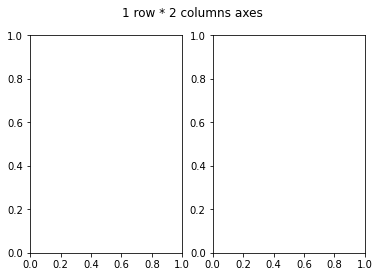

In [25]:

fig, ax=plt.subplots(1, 2) # 각각 행과 열을 의미합니다. 1행의 2열의 그래프가 만들어집니다.
fig.suptitle('1 row * 2 columns axes')
plt.show()

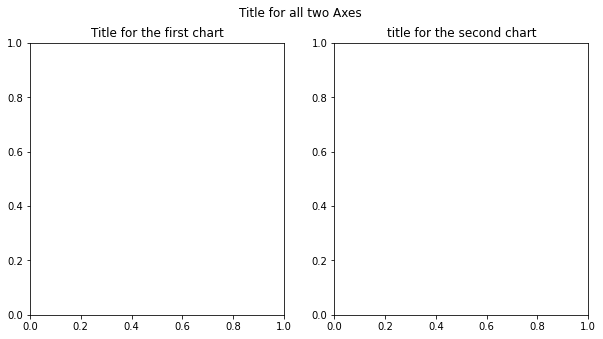

In [27]:


fig, ax=plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Title for all two Axes')
ax[0].set_title('Title for the first chart') # 각 그래프의 개별 제목을 달떄는 Axes의 객체인 
ax[1].set_title('title for the second chart') # ax를 활용합니다
fig.show()



Text(0.5, 1.0, 'without linear regression line')

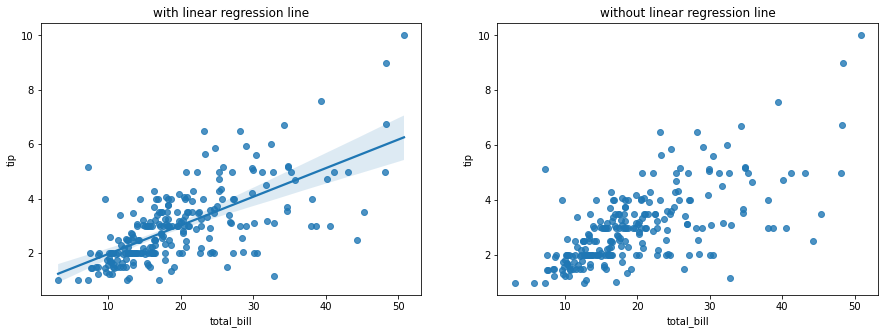

In [30]:
# 이를 활용해서 실전 subplot을 만들어보겠습니다.

fig, ax= plt.subplots(1, 2, figsize=(15,5))

sns.regplot(x='total_bill', y='tip', data=tips,
           ax=ax[0], fit_reg=True)
ax[0].set_title('with linear regression line')

sns.regplot(x='total_bill', y='tip', data=tips,
           ax=ax[1], fit_reg=False)
ax[1].set_title('without linear regression line')


## 히스토그램 / 커널 밀도 그래프


히스토그램은 연속형 데이터의 분포를 정확하게 나타내는데, 막대 그래프와 비슷해 처음 입문하는 사람들이 혼동하기도 합니다. 
'seaborn'에서 구현하고 싶을떄는 'displot()'함수를 사용해서 구현됩니다.
기본값으로 히스토그램과 커널 밀도 함수를 출력합니다. 

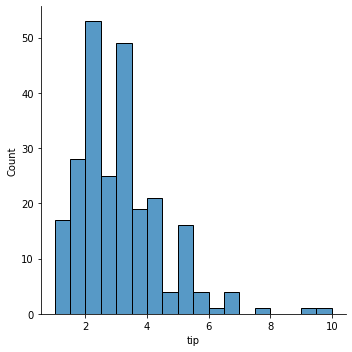

In [31]:
# 히스토그램 그리기
tips = sns. load_dataset('tips')
sns.displot(x='tip', data=tips)
plt.show()

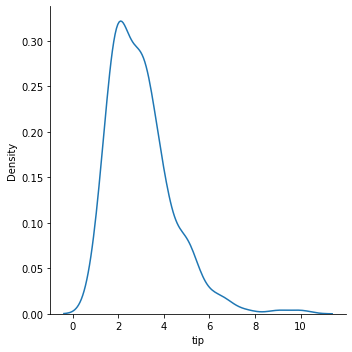

In [32]:
# 커널 밀도함수를 그립니다.
sns.displot(x='tip', kind='kde', data=tips) 
plt.show()
# 커널 밀도 함수는 빈도수를 퍼센티지로 보여줍니다.

## 박스플롯 in Seaborn

- boxplot()
- violinplot()
- swarmplot() 
  :박스플롯의 중간치를 확인하며 분포도 확인할수 있는 그래프입니다.

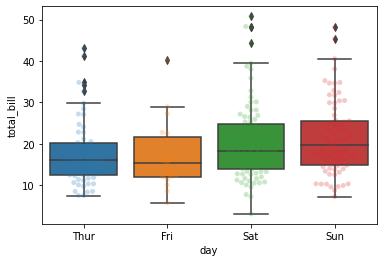

In [33]:
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, alpha=.25)
plt.show()

# 이렇게 그리니까 이상치 애들이 눈에 확 틔네 

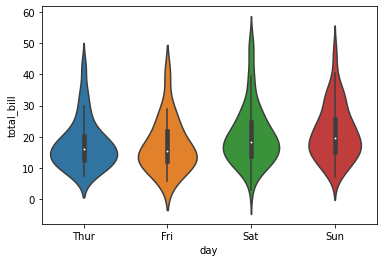

In [34]:
# 바이올린 플롯을 그려봤습니다. 
sns.violinplot(x='day', y='total_bill', data=tips)

## 빈도를 그릴수 있는 막대그래프


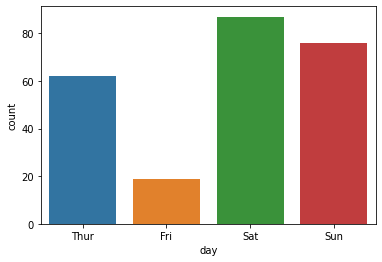

In [35]:
sns.countplot(x='day', data=tips)
plt.show()

- 요일별로 정렬되어 좋지만 오름차순 또는 내림차순으로 정렬하고 싶습니다.
- 이떄 필요한것은 pandas-- value_counts()의 활용이 필요합니다.
- value_coutns() 기본값은 문자열 함수의 빈도수를 내림차순으로 출력합니다.
- 만약 오름차순으로 정렬하고 싶으면 value_counts(ascending=False)형태로 변경합니다.



In [36]:
# value_conunt() 실습을 하겠습니다.

print(tips['day'].value_counts())
# 인덱스인 '요일'과 
# 그에 해당하는 값인 '빈도수'가 출력됩니다.

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


In [40]:
print(tips['day'].value_counts().index)
# Categoricalindex == 빈도수 별로 정렬 했을 때 인덱스의 순서입니다.
# categories == 원래 문자열이 가지고 있던 순서 입니다.
# ordered=False  == 내림차순입니다.
# dtype ='category' == 데이터 타입이 범주형입니다.

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


In [41]:
print(tips['day'].value_counts().values)
# 순서대로 정렬했을떄 해당 인덱스의 값만 보여줍니다.

[87 76 62 19]


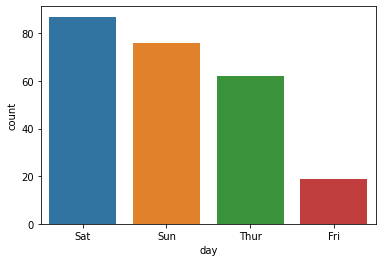

In [43]:
# value_counts().index) 함수를 사용하면 순서대로 정렬된 인덱스를 출력하는것이  포인트입니다.
# 이를 활용해 우린 다음과 같은 그래프를 그릴수 있습니다.

sns.countplot(x='day', data=tips, order=tips['day'].value_counts().index)
plt.show()

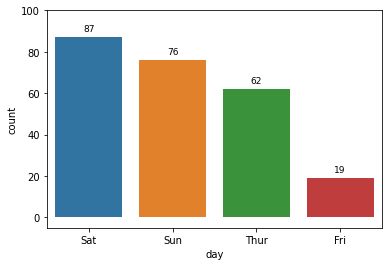

In [48]:
# 자 이번에는 각각의 막대바에 숫자를 표시해보겠습니다. 

ax=sns.countplot(x='day', data=tips,
                 order=tips['day'].value_counts().index)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height+3, height, ha='center', size=9)
  # height+3 , 막대바의 위치보다 3높은지점에 쓰겠습니다, 
  # height, 막대바에 들어갈 값 내용입니다. 
  # ha='center', 막대바의 가로기준으로 어디 위치할지 말해주는건데 이거는 중앙이네요.
  # size= 9 font 사이즈는 9입니다.
  ax.set_ylim(-5,100)
plt.show()

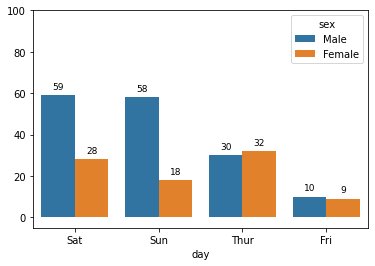

In [52]:
# 자 이번에는 'hue'라는 옵션을 사용해서 더 많은 정보를 전달 해보도록 하겠습니다. 

ax=sns.countplot(x='day', data=tips, hue='sex', dodge=True,
                 order=tips['day'].value_counts().index)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height+3, height, ha='center', size=9)
  # height+3 , 막대바의 위치보다 3높은지점에 쓰겠습니다, 
  # height, 막대바에 들어갈 값 내용입니다. 
  # ha='center', 막대바의 가로기준으로 어디 위치할지 말해주는건데 이거는 중앙이네요.
  # size= 9 font 사이즈는 9입니다.
  ax.set_ylim(-5,100)
ax.set(ylabel=None)
plt.show()

# 상관관계 히트 맵


- 상관관계 분석의 종류는 변수의 특성 및 표본의 개수에 따라 여러 갈래로 나뉩니다.
  - 피언슨, ㅡ피어만, 켄달, 점이연, 이연 상관 계수 관련 표작성 
  - 여기서는 수치형 변수로만 이뤄진 두 변수간의 연관성을 파악합니다.
  - 일반적으로 이런경우는 Pearson Correlation Analysis을 의미합니다.
  - 두 변수 간 선형적 관계의 강도를 'R'로 표현합니다.

  

- 이떄 사용되는 개념은 두가지로 공분산과 상관계수가 있습니다.
  - 먼저 공분산은 x변수와 y 변수가 동시에 변하는 정도의 양으로 표현한것입니다.
  - X의 편차와 y의 편차의 곱의 평균을 말합니다.
  - 결과값이 양수이면 양의 선형관계, 음수이면 음의 선형 관계가 존재한다고 하는데요.
  - 그런데 이 공분사의 크기는 척도(단위)에 영향을 받아 공분산은 일정한 값을 가질 수 없습니다. 이러한 척도의 크기와 상관없이 계산이 가능하도록 도와주는 표준화 작업이 필요한데요. 
    - 예를 들면 kg을 사용하면 1-100 사이가 수집되겠지만 g이라면 1000`10000이 수집됩니다. 즉 수집되는 값에 따라 공부산의 값이 크게 변동되는 다넘이 있어요. 이러한 문제를 해결한 것이 상관관계입니다. 
  -2)상관관계
    - 상관관계는 공분산을 각각 x편차와 y편차의 곱으로 나눈것이에요.
      -상관계수 -1 에서 1 사이의 값을 가집니다.
      - -1 또는 1에 가까울수록 밀접한 관계를 가진다는 뜻이고
      - 값이 0이면 확실히 관계가 없다는 뜻이에요.
    


In [53]:
# 직접 시각화 해보겠습니다.

mpg = sns.load_dataset('mpg')
print(mpg.shape) 

(398, 9)


In [54]:
num_mpg = mpg.select_dtypes(include=np.number)
#slect_dtypes 함수는 변수를 선택해서 가져옵니다.
# include=np.number 수치 데이터만 의미합니다.
print(num_mpg.shape)

(398, 7)


In [55]:
# 숫자형 데이터만 가져왔는지 확인해볼께요.

num_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


pandas.DataFrame.select_dtype
를 통해 object, datatimes, timedelta 가능합니다.
나중에 확인합시다.

In [57]:
num_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


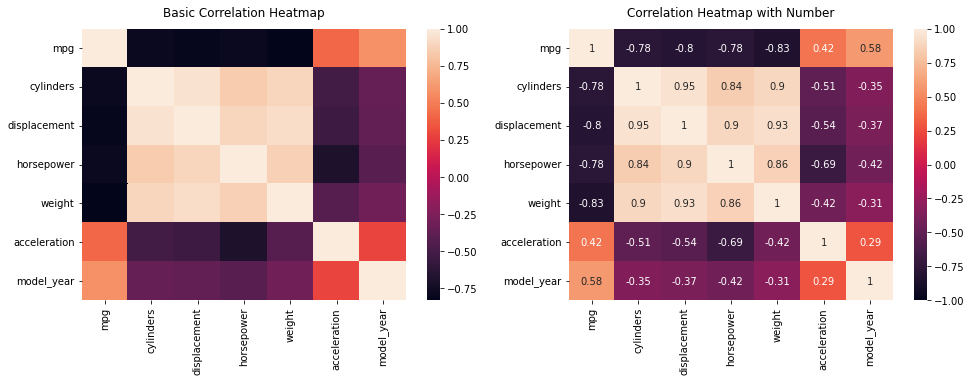

In [58]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.heatmap(num_mpg.corr(), ax=ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad=12)

sns.heatmap(num_mpg.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
#vmin=-1, vmax=1, 최소값과 최대값을 의미합니다.
# annot=True, 각 cell 값을 표기할것인지 선택하는 명령어에요. 

ax[1].set_title('Correlation Heatmap with Number', pad=12)

plt.show()

- 해석에 대해서 예를 들어보겠습니다.
  - -83이 보이시나요? x -axis 는 weight 이고 y-axis= mpg입니다.
  - 이 도표를 해석하는 방법은 weight 이 커질수록 mpg 가 작아진다는 음의 상관관계가 라는것을 도표가 보여주고 있어요.

In [64]:
# 다음과정은 heatmap의 가독성을 높이기 위해 마스크를 씌우는 과정입니다.
print(int(True))
np.triu(np.ones_like(num_mpg.corr()))

1


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [65]:
# 여기에서 1에 해당하는 값을 감추려고 합니다.
mask=np.triu(np.ones_like(num_mpg.corr(), dtype=np.bool))
print(mask)

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


<ipython-input-65-3f6fd3741cd9>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(num_mpg.corr(), dtype=np.bool))


<bound method Figure.show of <Figure size 1152x360 with 2 Axes>>

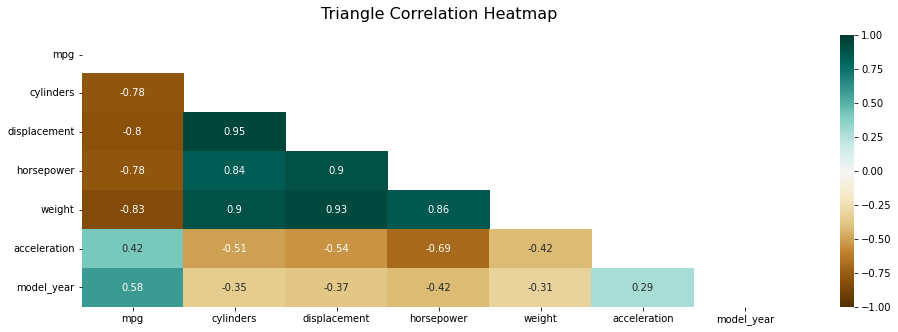

In [66]:
fig, ax=plt.subplots(figsize=(16,5))

ax=sns.heatmap(num_mpg.corr(), mask=mask,
               vmin=-1, vmax=1,
               annot=True,
               cmap='BrBG', cbar=True)
ax.set_title('Triangle Correlation Heatmap', pad=16, size=16)
fig.show